**классификатор изображений на основе свёрточной сети**

Евгений Борисов <esborisov@sevsu.ru>

---

Backpropagation applied to handwritten zip code recognition.    
LeCun Y., Boser B., Denker J.S., Henderson D., Howard R.E., Hubbard W., Jackel L.D.   
Neural Computation 1989 1(4):541-551.  

http://yann.lecun.com/exdb/publis/pdf/lecun-89e.pdf   

---

In [1]:
import numpy as np
import numpy.random as rng
from matplotlib import pyplot as plt

## загружаем датасет

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(image_train, target_train),(image_test, target_test) = fashion_mnist.load_data()

image_train.shape, image_test.shape

((60000, 28, 28), (10000, 28, 28))

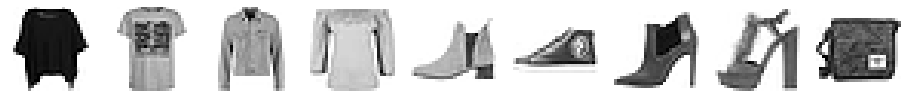

In [3]:
n_show, ppc, cpb = 9, (8,8), (2,2) # pixels per cell, cells per block

plt.figure(figsize=(16,4))
for n,i in enumerate(rng.permutation(len(image_train))[:n_show], start=1):
    img = image_train[i]
    plt.subplot(1,n_show,n)
    plt.axis(False)
    plt.imshow(img,cmap='gray_r')


In [5]:
image_train.min(),image_train.max()

(0, 255)

## подготовка данных

In [6]:
# масштабируем данные в [-1,1], добавляем ещё одну размерность (канал цвета)

im2ar = lambda im: (im-127.5)/127.5

x_train = im2ar(image_train).astype(np.float32)[:,:,:,np.newaxis]
x_test  = im2ar(image_test).astype(np.float32)[:,:,:,np.newaxis]

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
x_train.min(),x_train.max()

(-1.0, 1.0)

In [8]:
# one hot encoding
y_train = np.eye(len(target_train),target_train.max()+1,dtype=np.float32)[target_train]
y_test = np.eye(len(target_test),target_train.max()+1,dtype=np.float32)[target_test]
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

## Модель

In [9]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [10]:
# from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import plot_model

In [11]:
INPUT_SHAPE = x_train.shape[1:] # размер входного образа
N_CLASSES = y_train.shape[1] # размер выхода

In [12]:
model = Sequential()
model.add(Input( shape=INPUT_SHAPE, name='input1' ) )
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', name='conv1', ))
model.add(MaxPooling2D(pool_size=2,strides=2, name='mpool1',))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu', name='conv2', ))
model.add(Flatten(name='flatten1'))
model.add(Dense(512,activation='relu',name='hidden1',))
model.add(Dense(N_CLASSES, activation='softmax',name='out_softmax',))

2022-04-19 15:48:57.688400: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 15:48:57.752232: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 15:48:57.752415: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 15:48:57.752905: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

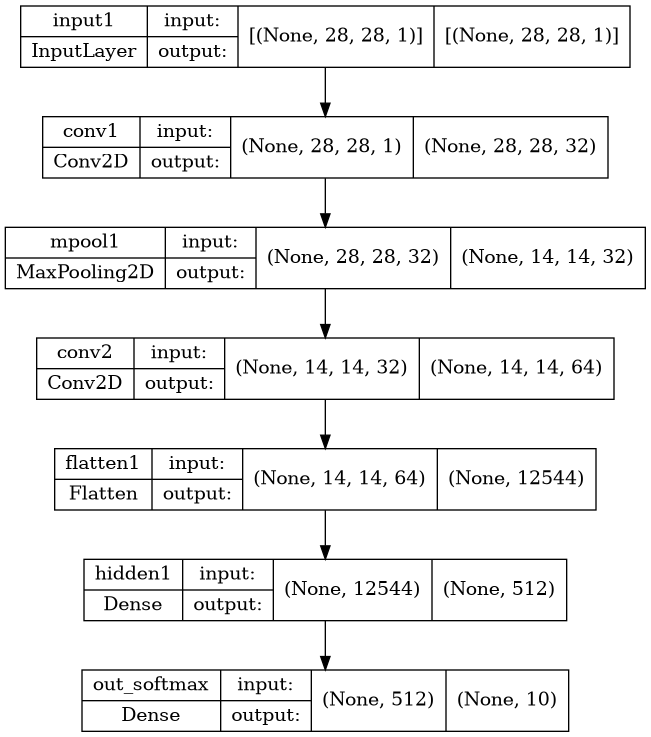

In [13]:
# model.summary()
plot_model(model,to_file='cnn.png', show_layer_names=True, show_shapes=True )

## Обучение

In [14]:
%%time

N_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
VALIDATION_SPLIT = .2
LEARNING_RATE = 2e-4

optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

history = model.fit(x_train, y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=N_EPOCH, 
                    verbose=VERBOSE, 
                    validation_split=VALIDATION_SPLIT)

Epoch 1/20


2022-04-19 15:49:19.964004: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8300


375/375 [==============================] - 5s 9ms/step - loss: 0.1048 - accuracy: 0.8077 - val_loss: 0.0736 - val_accuracy: 0.8647
Epoch 2/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0654 - accuracy: 0.8778 - val_loss: 0.0600 - val_accuracy: 0.8867
Epoch 3/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0569 - accuracy: 0.8931 - val_loss: 0.0557 - val_accuracy: 0.8950
Epoch 4/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0517 - accuracy: 0.9034 - val_loss: 0.0546 - val_accuracy: 0.8978
Epoch 5/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0475 - accuracy: 0.9114 - val_loss: 0.0515 - val_accuracy: 0.9002
Epoch 6/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0441 - accuracy: 0.9178 - val_loss: 0.0481 - val_accuracy: 0.9104
Epoch 7/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0408 - accuracy: 0.9233 - val_loss: 0.0471 - val_accuracy: 0.9082
Epoch 8/20
375/37

## Тестирование

In [15]:
x_test.shape

(10000, 28, 28, 1)

In [16]:
score = model.evaluate(x_test, y_test, verbose=False)
print('Test accuracy:', score[1])

Test accuracy: 0.9221000075340271


In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

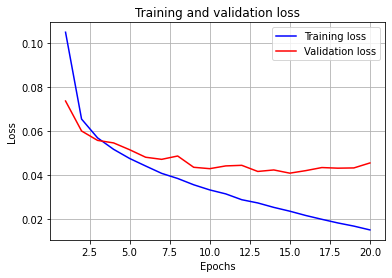

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

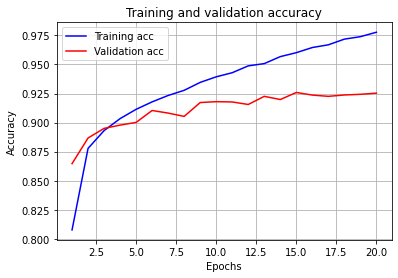

In [19]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

---

In [20]:
%%time 

o_test = np.argmax( model.predict(x_test),axis=1)

class_names = [ 
    'футболка', 
    'брюки', 
    'свитер', 
    'платье', 
    'пальто', 
    'сандали', 
    'рубашка', 
    'тапки', 
    'сумка', 
    'полусапожки', 
    ]

from sklearn.metrics import classification_report

print(classification_report(target_test, o_test, target_names=class_names) ) 

              precision    recall  f1-score   support

    футболка       0.89      0.85      0.87      1000
       брюки       0.99      0.98      0.99      1000
      свитер       0.84      0.91      0.88      1000
      платье       0.91      0.94      0.92      1000
      пальто       0.90      0.87      0.88      1000
     сандали       0.98      0.98      0.98      1000
     рубашка       0.80      0.76      0.78      1000
       тапки       0.95      0.98      0.96      1000
       сумка       0.98      0.98      0.98      1000
 полусапожки       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

CPU times: user 878 ms, sys: 32.2 ms, total: 910 ms
Wall time: 774 ms


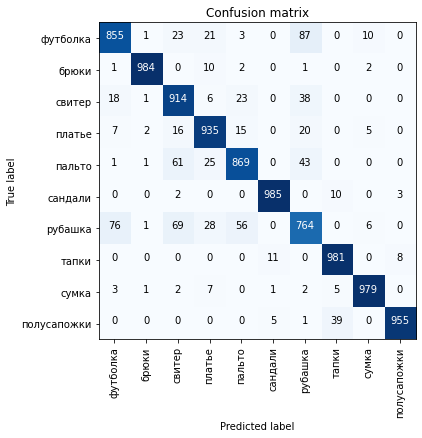

In [21]:
# матрица ошибок
import itertools
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test,o_test)

classes=class_names
thresh = cm.max()/2.
tick_marks = np.arange(len(classes))

fig = plt.figure(figsize=(6,6))
plt.title('Confusion matrix')
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    c = 'white' if cm[i,j] > thresh else 'black'
    plt.text(j,i, f'{cm[i,j]}',horizontalalignment="center",color=c)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

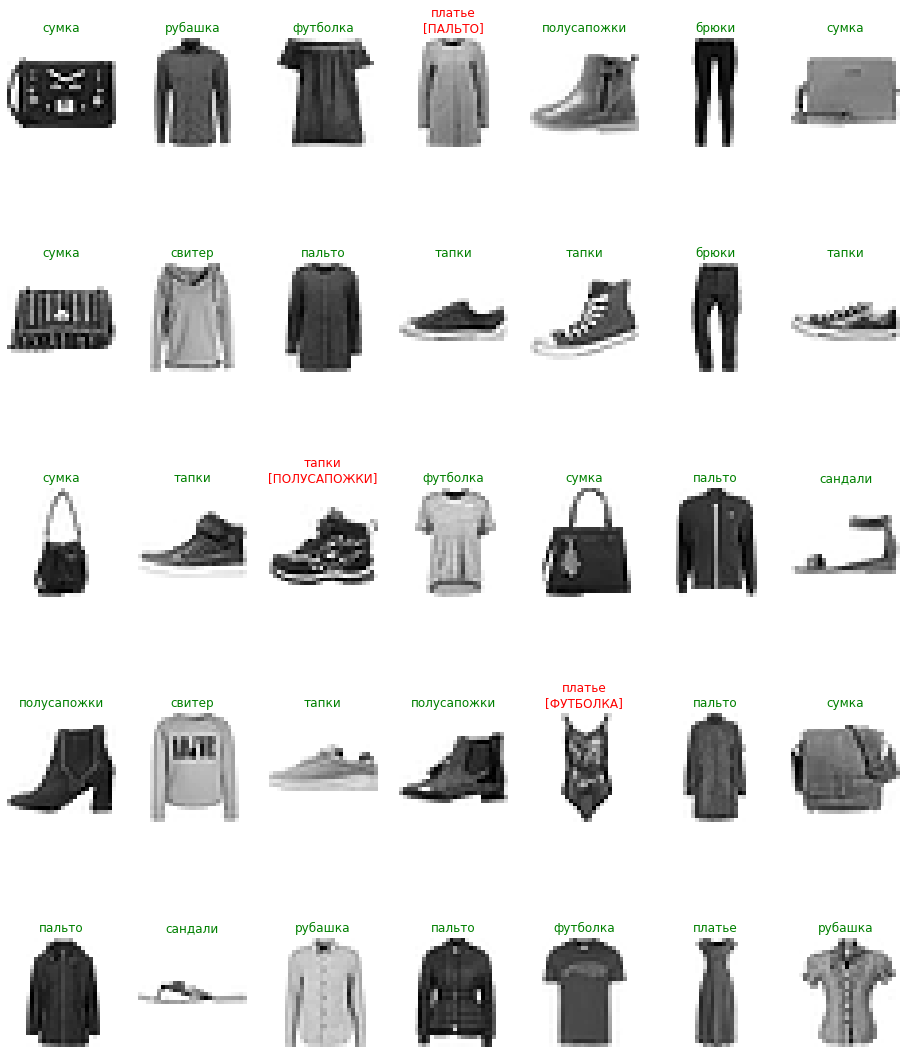

In [22]:
n_show, n_cols = 35, 7

n_rows = np.ceil(n_show/n_cols).astype(int)

plt.figure(figsize=(16,4*n_rows,))
for n,i in enumerate( rng.permutation(len(image_test))[:n_show] ):
    img = image_test[i]
    
    er = target_test[i]==o_test[i]
    t_mark = class_names[target_test[i]] 
    t_pred = class_names[o_test[i]] 
    t,c = (t_mark,'g') if er else (f'{t_pred}\n[{t_mark.upper()}]','r')
   
    plt.subplot(n_rows,n_cols,n+1)
    plt.axis(False)
    plt.title(t,color=c)
    plt.imshow(img,cmap='gray_r')

---

In [ ]:
# !mkdir -p ../data/fashion-mnist
# !wget -P ../data/fashion-mnist -c http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
# !wget -P ../data/fashion-mnist -c http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
# !wget -P ../data/fashion-mnist -c http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
# !wget -P ../data/fashion-mnist -c http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

# # http://yann.lecun.com/exdb/mnist/
# import gzip
# import idx2numpy

# def ar2im(x): return ((x-x.min())/(x.max()-x.min())*255.).astype(np.uint8)

# DATASET_FOLDER = 'fashion-mnist'

# with gzip.open( DATASET_FOLDER+'/train-images-idx3-ubyte.gz','rb') as f:
#     image_train = idx2numpy.convert_from_string(f.read())
    
# with gzip.open( DATASET_FOLDER+'/train-labels-idx1-ubyte.gz','rb') as f:
#     target_train = idx2numpy.convert_from_string(f.read())

# with gzip.open( DATASET_FOLDER+'/t10k-images-idx3-ubyte.gz','rb') as f:
#     image_test = idx2numpy.convert_from_string(f.read())
    
# with gzip.open( DATASET_FOLDER+'/t10k-labels-idx1-ubyte.gz','rb') as f:
#     target_test = idx2numpy.convert_from_string(f.read())

# image_train.shape, image_test.shape

In [ ]:
# from tabulate import tabulate
# import tensorflow as tf
# from tensorflow.test import is_built_with_cuda
# from tensorflow.python.client.device_lib import list_local_devices

# def tf_info(tablefmt='html'):
#     res = [ ['tensorflow','%s'%(tf.__version__)],['keras','%s'%(tf.keras.__version__)] ]
#     if is_built_with_cuda():
#         res.extend( [ 
#               [ s.strip().split(': ') for s in d.physical_device_desc.split(',')  ]
#                for d in list_local_devices() 
#               if d.device_type == 'GPU' # and d.name==tf.test.gpu_device_name()
#             ][0] )
#     else:
#         res.append(['','no CUDA support'])
#     return tabulate( res, tablefmt=tablefmt )


# tf_info()